# neuralthreads
[medium](https://neuralthreads.medium.com/i-was-not-satisfied-by-any-deep-learning-tutorials-online-37c5e9f4bea1)

## Chapter 2 — Optimizers

### 2.5 How does RMSprop works?

> First post (own_tutorial_1.ipynb).

> Second post (own_tutorial_2.ipynb).

> Third post (own_tutorial_3.ipynb).

> Fourth post (own_tutorial_4.ipynb).

> Fifth post (own_tutorial_5.ipynb).

> Sixth post (own_tutorial_6.ipynb).

> Previous post (own_tutorial_7.ipynb).

RMSprop stands for Root Mean Square Propagation. It was proposed by Geoffrey Hinton. It solves the problem that arises in Adagrad, i.e., the square of gradients gets accumulated over time making the accumulator big which slows the learning. The idea is simple which is used in RMSprop, we will collect square of gradients but in a restricted manner.

And, we will calculate the update as follow:

In [1]:
%%latex
\begin{gather*}
    update = - learning\_rate * \frac{gradient}{\sqrt{accumulator} + epsilon}
\end{gather*}

<IPython.core.display.Latex object>

This post is divided into 3 sections.

1. RMSprop in 1 variable

2. RMSprop animation for 1 variable

3. RMSprop in multi-variable function

## #1 RMSprop in 1 variable

In this method, we store the square of gradients in a restricted manner and we initialize accumulator = 0. The rest is the same as what we did in Adagrad.

RMSprop algorithm in simple language is as follows:

> Step 1 - Set starting point and learning rate

> Step 2 - Initiate accumulator = 0 and set rho = 0.9 and epsilon = 10**-8

> Step 3 - Initiate loop

>          Step 3.1 - calculate accumulator = rho * accumulator + (1 - rho) * gradient**2

>          Step 3.2 - calculate update as stated above

>          Step 3.3 - add update to point

First, let us define the function and its derivative and we start from x = -1

In [2]:
%%latex
\begin{gather*}
    y = f(x) = x - x^{3} \\
    \frac{dy}{dx} = f'(x) = 1 - 3x^{2} \\  
\end{gather*}

<IPython.core.display.Latex object>

In [3]:
import numpy as np
np.random.seed(42)

def f(x):                           # function definition                        
    return x - x**3

def fdash(x):                       # function derivative definition
    return 1 - 3*(x**2)

And now RMSprop

In [4]:
point = -1                                   # step 1
learning_rate = 0.01

rho = 0.9                                    # step 2
accumulator = 0
epsilon = 10**-8

for i in range(1000):                        # step 3
    accumulator = rho * accumulator + (1 - rho) * fdash(point)**2          # step 3.1
                                             
    update = - learning_rate * fdash(point) / (accumulator**0.5 + epsilon) # step 3.2
                                             
    point += update                          # step 3.3
    
point                                        # Minima

-0.5773502691896257

RMSprop implementation in Python is a success.

## #2 RMSprop animation for better understanding

Everything thing is the same as what we did earlier for the animation of the previous 4 optimizers. We will create a list to store starting point and updated points in it and will use the iᵗʰ index value for iᵗʰ frame of the animation.

In [5]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
from matplotlib.animation import PillowWriter
point_rmsprop = [-1]                      # initiating list with
                                          # starting point in it
point = -1                                # step 1
learning_rate = 0.01

rho = 0.9                                 # step 2
accumulator = 0
epsilon = 10**-8

for i in range(1000):                     # step 3
    accumulator = rho * accumulator + (1 - rho) * fdash(point)**2 # step 3.1
    update = - learning_rate * fdash(point) / (accumulator**0.5 + epsilon) # step 3.2
    point += update                       # step 3.3
    
    point_rmsprop.append(point)           # adding updated point to
                                          # the list
    
point                                     # Minima

-0.5773502691896257

We will do some settings for our graph for the animation. You can change them if you want something different.

Text(0.5, 1.0, 'RMSprop, learning_rate = 0.01')

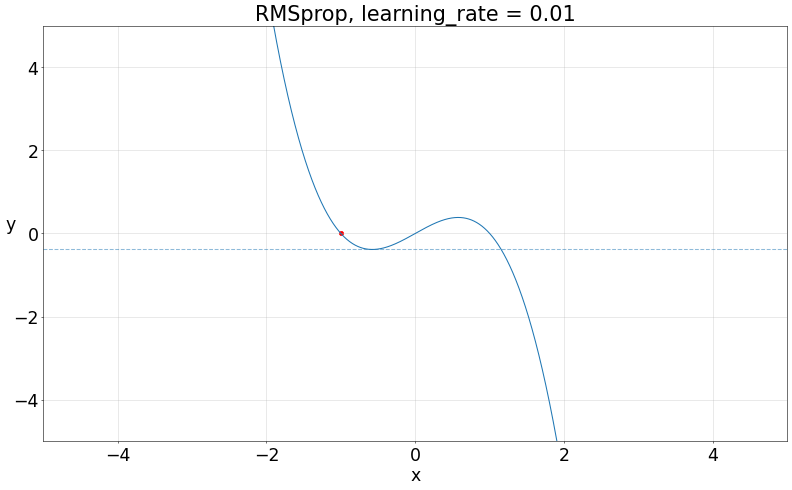

In [6]:
plt.rcParams.update({'font.size': 25})

fig = plt.figure(dpi = 50)
fig.set_figheight(10.80)
fig.set_figwidth(19.20)

x_ = np.linspace(-5, 5, 10000)
y_ = f(x_)

ax = plt.axes()
ax.plot(x_, y_)
ax.grid(alpha = 0.5)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel('x')
ax.set_ylabel('y', rotation = 0)
ax.scatter(-1, f(-1), color = 'red')
ax.hlines(f(-0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)
ax.set_title('RMSprop, learning_rate = 0.01')

Now we will animate the RMSprop optimizer.

In [7]:
def animate(i):
    ax.clear()
    ax.plot(x_, y_)
    ax.grid(alpha = 0.5)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('x')
    ax.set_ylabel('y', rotation = 0)
    ax.hlines(f(-0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)
    ax.set_title('RMSprop, learning_rate = 0.01')
    
    ax.scatter(point_rmsprop[i], f(point_rmsprop[i]), color = 'red')


The last line in the code snippet above is using the iᵗʰ index value from the list for iᵗʰ frame in the animation.

In [8]:
anim = animation.FuncAnimation(fig, animate, frames = 200, interval = 10)
anim.save('2.5.SGD_RMSprop.gif')

We are creating an animation that only has 200 frames and the gif is at 50 fps or frame interval is 20 ms.

It is to be noted that in less than 200 iterations we have reached the minima.

## #3 RMSprop in multi-variable function (2 variables right now)

Everything is the same, we only have to initialize point (1, 0) and accumulator = 0 but with shape (2, 1) and replace fdash(point) with gradient(point).

But first, let us define the function, its partial derivatives and, gradient array



In [9]:
%%latex
\begin{gather*}
    f = 2x^{2} + 2xy + 2y^{2} - 6x \\
        \text{We know that Minima for this function is at (2, -1)} \\
        \text{and we will start from (1, 0)}\\
        \text{The partial derivatives are}\\
        \frac{\partial f}{\partial x} = 4x + 2y - 6 \\
        \frac{\partial f}{\partial y} = 2x + 4y \\
 \end{gather*}

<IPython.core.display.Latex object>

In [10]:
def f(x, y):                                    # function
    return 2*(x**2) + 2*x*y + 2*(y**2) - 6*x    # definition

def fdash_x(x, y):                              # partial derivative
    return 4*x + 2*y - 6                        # w.r.t x

def fdash_y(x, y):                              # partial derivative
    return 2*x + 4*y                            # w.r.t y

def gradient(point):                            # gradients
    return np.array([[     fdash_x(point[0][0], point[1][0])     ],
                     [     fdash_y(point[0][0], point[1][0])     ]], dtype = np.float64)

Now the steps for RMSprop in 2 variables are

In [11]:
point = np.array([[   1   ],                        # step 1
                  [   0   ]], dtype = np.float32)
learning_rate = 0.01

rho = 0.9                                           # step 2
accumulator = np.array([[   0   ],
                        [   0   ]], dtype = np.float32)
epsilon = 10**-8
for i in range(1000):                               # step 3
    accumulator = rho * accumulator + (1 - rho) * gradient(point)**2  # step 3.1
                                                    
    update = - learning_rate * gradient(point) / (accumulator**0.5 + epsilon) # step 3.2
                                                    
    point += update                                 # step 3.3
    
point                                               # Minima

array([[ 2.],
       [-1.]], dtype=float32)

I hope now you understand RMSprop.